In [1]:
import itertools
import numpy as np
import numpy.random as npr
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import colors
from matplotlib import gridspec
import matplotlib

import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D  

import scipy.io
from scipy.io import loadmat
from scipy.io import savemat
from scipy import stats
from scipy.special import softmax
from sklearn.metrics import log_loss
import pickle
import copy

%load_ext autoreload
%autoreload 2

plt.rcParams.update({'font.family':'Arial'})

In [2]:
subjectNames = ['sam','tabitha','chloe','blanche','b01','b02','b03','b04','b05','b06','b07','b08','b09','b10']

numSubjects = len(subjectNames)

stateNames = ['Persist','Preferred','Random','Avoid']
historyNames = ['(0,0)','(1,0)','(0,1)','(1,1)']

speciesList = np.array([0,0,0,0,1,1,1,1,1,2,2,2,2,2])

speciesColor = ['#fb8072','#8dd3c7','#74add1']
speciesDColor = ['#6a0e03','#1d4c44','#183649']
speciesNames = ['monkey','human','human2']

def getPM(N):
    if N == 1:
        return 1
    elif N > 1:
        x = np.zeros([N])
        x[0] = 1
        for i in np.arange(1,N):
            x[i] = -1 * x[i-1]
        return x

######################################
    
analysis = []
data = []
data0 = []


for i in range(numSubjects):
    with open('analysis/tmp/'+subjectNames[i]+'.pickle', 'rb') as f:
        [A] = pickle.load(f)
    analysis.append(A)
    with open('data/tmp/'+subjectNames[i]+'.pickle', 'rb') as f:
        [D] = pickle.load(f)
    data.append(D)
    data0.append(D)


categoryNames = ['Perseveration',
                 'Random search',
                 'Rule random, \n Exploration',
                 'Rule favored, \n Exploration',
                 'Rule preferred, \n No exploration',
                 'Rule persist, \n No exploration']

In [3]:
Lc = np.zeros([numSubjects,6])
LcCP = np.zeros([4,3,6])
VarLc = np.zeros([numSubjects,6])
propLc = np.zeros([numSubjects,6])
covvarLc = np.zeros([numSubjects,6])
rr = np.zeros([numSubjects,6])


for i in range(numSubjects):
    Lc[i] = analysis[i]['categoryAnalysis']['meanLCategory']
    VarLc[i] = analysis[i]['categoryAnalysis']['varLCategory']
    propLc[i] = analysis[i]['categoryAnalysis']['propLCategory']
    covvarLc[i] = analysis[i]['categoryAnalysis']['covvarLCategory']
    rr[i] = np.nanmean(analysis[i]['categoryAnalysis']['rewRateCat'],axis=1)

        
bw = 0.05
bins = np.arange(0,1+bw,bw)
numBins = bins.shape[0]-1

whenCategoryNormalized = np.zeros([numSubjects,6,numBins])
whenRewardNormalized = np.zeros([numSubjects,numBins])
for i in range(numSubjects):
    whenCategoryNormalized[i] = analysis[i]['categoryAnalysis']['probabilityCategory']
    whenRewardNormalized[i] = analysis[i]['categoryAnalysis']['probabilityReward']


/var/folders/d0/w_19qmbx12q36d9zs46hfymm0000gn/T/ipykernel_84053/663200990.py:14: RuntimeWarning: Mean of empty slice
  rr[i] = np.nanmean(analysis[i]['categoryAnalysis']['rewRateCat'],axis=1)


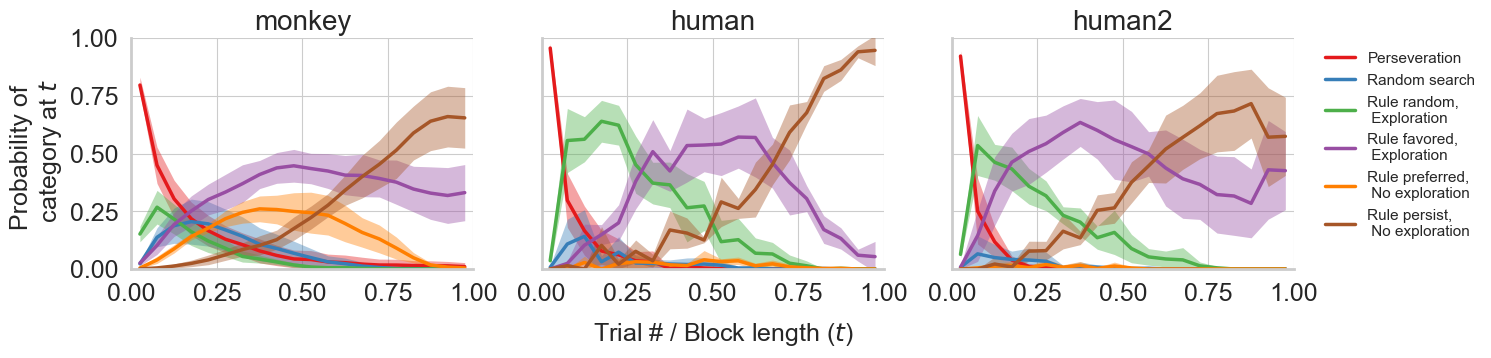

In [28]:
distrColors = np.array([[228,26,28],
[55,126,184],
[77,175,74],
[152,78,163],
[255,127,0],
[166,86,40]])/255

fig, ax = plt.subplots(sharey=True,sharex=True,ncols=3,nrows=1,figsize=(15,3))

fig.text(0.52, -0.13, 'Trial # / Block length ($t$)', ha='center', size=18)

binCenters = bins[:-1] + bw/2

for spInd in range(3): # Species
    idx = np.where(np.array(speciesList) == spInd)[0]

    for i in range(6): # Categories
        Y = whenCategoryNormalized[idx,i,:]
        meanY = np.mean(Y,axis=0)
        stdY = np.std(Y,axis=0)
        stderrY = stdY / np.sqrt(len(idx))

        loY = meanY - stdY
        hiY = meanY + stdY

        ax[spInd].plot(binCenters,meanY,color=distrColors[i],label=categoryNames[i],linewidth=2.5)
        ax[spInd].fill_between(binCenters,loY,hiY,alpha=0.4,color=distrColors[i],linewidth=0)
        ax[spInd].set_title(speciesNames[spInd],fontsize=20)
        if spInd == 0:
            ax[spInd].set_ylabel('Probability of \n category at $t$',fontsize=18)
        if spInd == 2:
            ax[spInd].legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False,fontsize=11)

    ax[spInd].set_ylim([0,1])
    ax[spInd].set_xlim([0,1])
    ax[spInd].set_yticks([0,0.25,0.5,0.75,1])
    ax[spInd].set_xticks([0,0.25,0.5,0.75,1])
    ax[spInd].tick_params(axis='x',labelsize= 18,direction='out',width=2,length=6)
    ax[spInd].tick_params(axis='y',labelsize= 18,direction='out',width=2,length=6)
    ax[spInd].spines['right'].set_visible(False)
    ax[spInd].spines['top'].set_visible(False)

    # change all spines
    for axis in ['top','bottom','left','right']:
        ax[spInd].spines[axis].set_linewidth(2)
####################


# plt.savefig('catNormTr.eps', format='eps')

Text(0, 0.5, 'Reward Probability')

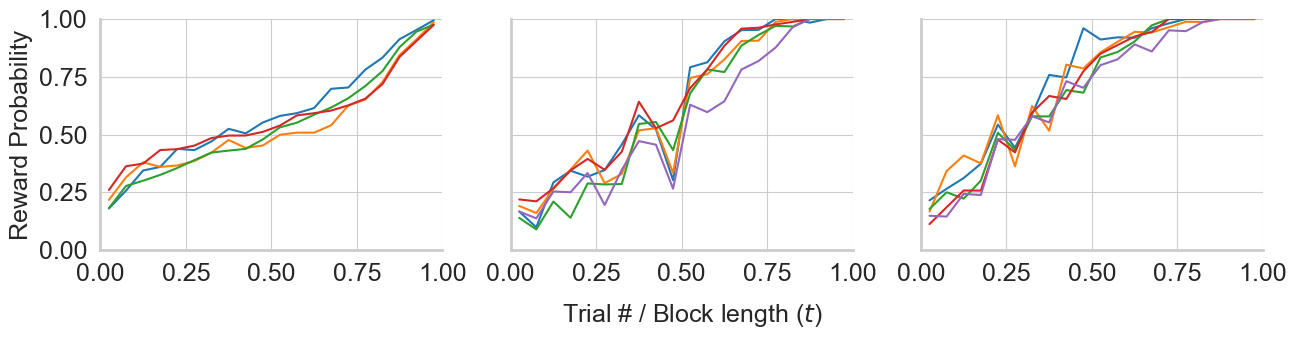

In [10]:
fig, ax = plt.subplots(sharey=True,sharex=True,ncols=3,nrows=1,figsize=(15,3))

fig.text(0.52, -0.13, 'Trial # / Block length ($t$)', ha='center', size=18)

binCenters = bins[:-1] + bw/2

for spInd in range(3): # Species
    idx = np.where(np.array(speciesList) == spInd)[0]
    ax[spInd].plot(binCenters, whenRewardNormalized[idx,:].T)

    ax[spInd].set_ylim([0,1])
    ax[spInd].set_xlim([0,1])
    ax[spInd].set_yticks([0,0.25,0.5,0.75,1])
    ax[spInd].set_xticks([0,0.25,0.5,0.75,1])
    ax[spInd].tick_params(axis='x',labelsize= 18,direction='out',width=2,length=6)
    ax[spInd].tick_params(axis='y',labelsize= 18,direction='out',width=2,length=6)
    ax[spInd].spines['right'].set_visible(False)
    ax[spInd].spines['top'].set_visible(False)

    # change all spines
    for axis in ['top','bottom','left','right']:
        ax[spInd].spines[axis].set_linewidth(2)

ax[0].set_ylabel('Reward Probability',fontsize=18)


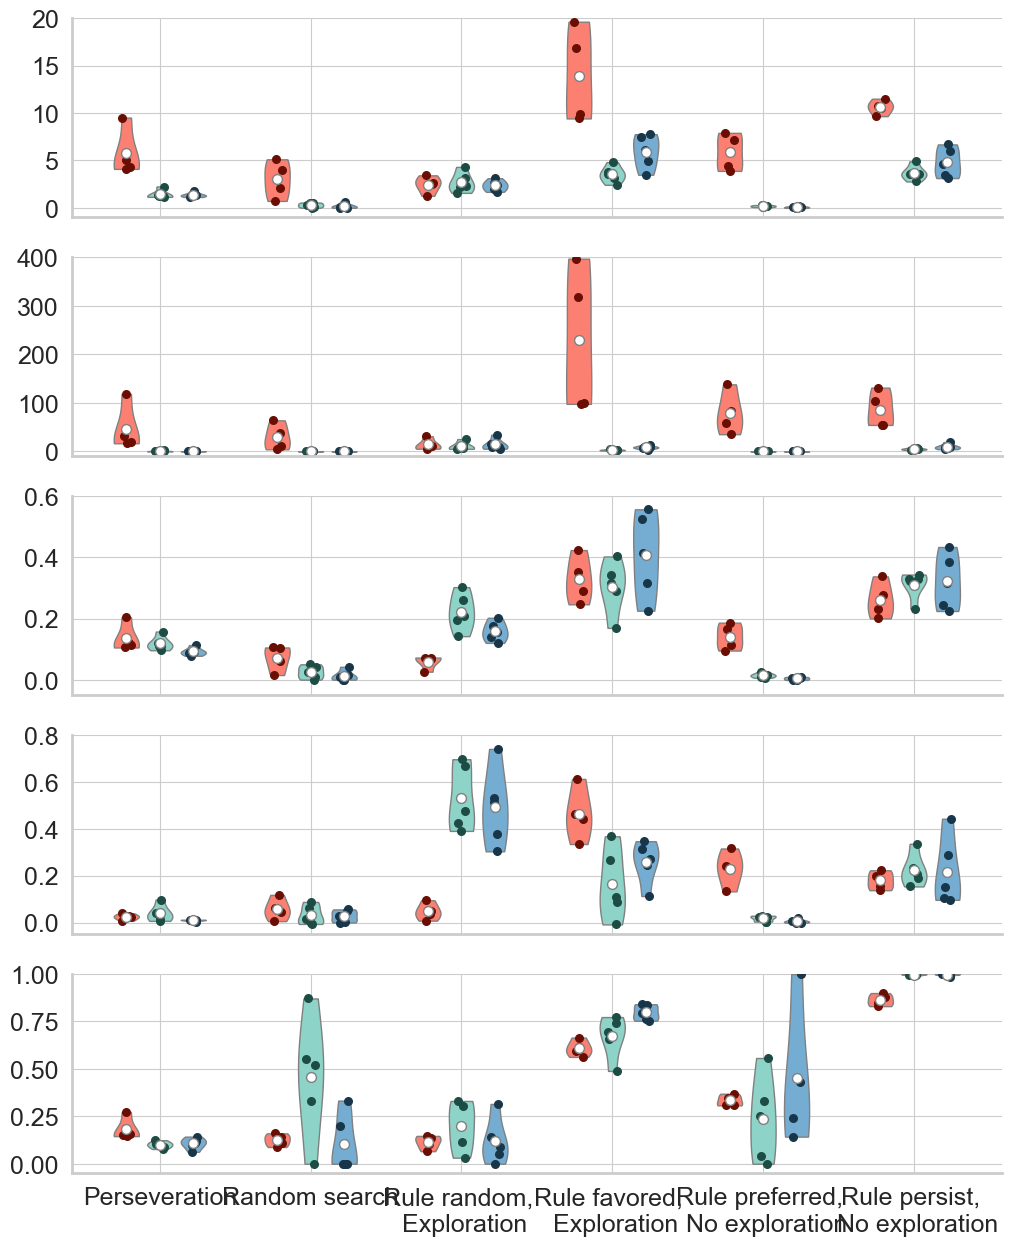

In [30]:
fig, ax = plt.subplots(ncols=1,nrows=5,sharex=True,figsize=(6*2,3*5))

vpWidth = 0.4
mxs = [20, 400, 0.6, 0.8, 1.0]
mns = [-1, -10, -0.05, -0.05, -0.05]
YTs = [[0,5,10,15,20],
       [0,100,200,300,400],
       [0,0.2,0.4,0.6],
       [0,0.2,0.4,0.6,0.8],
       [0,0.25,0.5,0.75,1.0]]
DATs = [Lc, VarLc, propLc, covvarLc, rr]
for d in range(5): # metric
    dat = DATs[d]
    mx = mxs[d]
    mn = mns[d]
    YT = YTs[d]

    XT = []
    for i in range(6): # category

        for spInd in range(3): # Species
            idx = np.where(np.array(speciesList) == spInd)[0]

            # monkey
            data1 = dat[idx,i]
            data1 = np.delete(data1,np.where(np.isnan(data1))[0], axis=0)
            x1 = -vpWidth/1.5 + spInd*(vpWidth/1.5)#*1.5
            vp1 = ax[d].violinplot(data1,[x1+i*1.2],showextrema=False,widths=0.5*vpWidth)
            for pc in vp1['bodies']:
                pc.set_facecolor(speciesColor[spInd])
                pc.set_edgecolor('gray')
                pc.set_alpha(1)

            x = npr.rand(data1.size) * (vpWidth) * (0.1)
            pm = getPM(x.shape[0])
            x = np.multiply(x,pm) + x1 +i*1.2
            ax[d].scatter(x,data1,s=30,color=speciesDColor[spInd])

            ax[d].scatter(x1+i*1.2,np.mean(data1),color='white',s=50,edgecolors='gray')


        XT.append(i*1.2)

    # print([XT,YT])
    ax[d].set_ylim([mn,mx])
    ax[d].set_xlim([-0.7,6.7])
    ax[d].set_xticks(XT)
    ax[d].set_xticklabels(categoryNames,fontsize=2)
    ax[d].set_yticks(YT)
    ax[d].tick_params(axis='x',labelsize= 18,direction='out',width=2,length=6)
    ax[d].tick_params(axis='y',labelsize= 18,direction='out',width=2,length=6)
    ax[d].spines['right'].set_visible(False)
    ax[d].spines['top'].set_visible(False)

    # change all spines
    for axis in ['top','bottom','left','right']:
        ax[d].spines[axis].set_linewidth(2)
    ax[d].grid(True)
    
 # plt.savefig('catStats.eps', format='eps')

In [4]:
def calcBootstrp(data1, data2):
    data1 = np.array(data1)
    data2 = np.array(data2)
    s = stats.ttest_ind(data1, data2, equal_var=False)
    t = s.statistic

    data1_hat = data1-np.mean(data1) + np.mean(np.concatenate([data1, data2]))
    data2_hat = data2-np.mean(data2) + np.mean(np.concatenate([data1, data2]))
    t_stars = []
    for i in range(10000):
        data1_samp = np.random.choice(data1_hat,size=data1.shape[0])
        data2_samp = np.random.choice(data2_hat,size=data2.shape[0])
        s = stats.ttest_ind(data1_samp, data2_samp, equal_var=False)
        t_stars.append(s.statistic)

    return t, t_stars

    



In [6]:
for i in range(np.shape(Lc)[1]):
    hmn = []
    mmn = []
    for j in range(4,np.shape(Lc)[0]):
        hmn.append(Lc[j,i])
    for j in range(4):
        mmn.append(Lc[j,i])

    print(hmn)
    print(mmn)

    t, t_stars = calcBootstrp(hmn,mmn)
#     plt.hist(t_stars,1000)
#     plt.xlim([-50,50])
    print(np.mean(t_stars<=t))

/var/folders/d0/w_19qmbx12q36d9zs46hfymm0000gn/T/ipykernel_84053/2854968814.py:13: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  s = stats.ttest_ind(data1_samp, data2_samp, equal_var=False)


0.0038
0.0623
0.4442
0.0606
0.0623
0.0026
